# C1 Excercise: Classification

Import standard libraries:

In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import urllib.request
import zipfile

Download the dataset automatically (will be saved in the current directory):

In [2]:
# download
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
urllib.request.urlretrieve(url, "HAR_Dataset.zip")

('HAR_Dataset.zip', <http.client.HTTPMessage at 0x272f35478b0>)

Unzip the dataset automatically:

In [3]:
with zipfile.ZipFile("./HAR_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(path=".")

*Hinweis:* Sie könne auch auf https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones (bzw.
https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) gehen und die Datei 'UCI HAR Dataset.zip' manuell herunterladen und entpacken.

In [4]:
start_path = Path(
    r'.//UCI HAR Dataset'
)
# Hinweis: falls Sie lokal arbeiten, geben Sie hier den lokalen ABSOLUTEN Pfad an, z.B. 
# r'C:\Users\schroth\PycharmProjects\data_literacy_vorlesung\Vorlesung 2022\UCI HAR Dataset'

Eine Hilfsfunktion, Code nicht abändern!

In [5]:
def read_train_signals(start_path):
    X_signal = []
    # read the train signal data
    for input_file in os.listdir(start_path / 'train/Inertial Signals/'):
        my_signal = pd.read_csv(start_path / 'train/Inertial Signals/' / input_file, header=None, delim_whitespace=True)
        X_signal.append(my_signal.to_numpy())
    X_signal = np.transpose(np.array(X_signal), (1, 2, 0))
    y_train = pd.read_csv(start_path / 'train/y_train.txt', header=None)
    y_train = y_train.values
    return X_signal, y_train

## Aufgabe I.1

Was bedeuten diese Zahlen?

In [6]:
# read the data
X_train,y_train = read_train_signals(start_path)
print(np.array(X_train).shape) # should be (7352, 128, 9)

(7352, 128, 9)


## Antwort I.1

To be filled


## Aufgabe I.2:

Betrachten Sie y_train. Was bedeuten die Eintraege? Hinweis:

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

In [7]:
print(y_train)

[[5]
 [5]
 [5]
 ...
 [2]
 [2]
 [2]]


## Antwort I.2

To be filled

## Aufgabe I.3
a) Was bedeutet hier die 29?

b) Plotten Sie weitere Aktivitäten, indem Sie die Zeile *activity = {29:'Sitting'}* anpassen.

Hinweis: Sie können die Datei *y_train* mit einen Texteditor untersuchen.

<IPython.core.display.Javascript object>


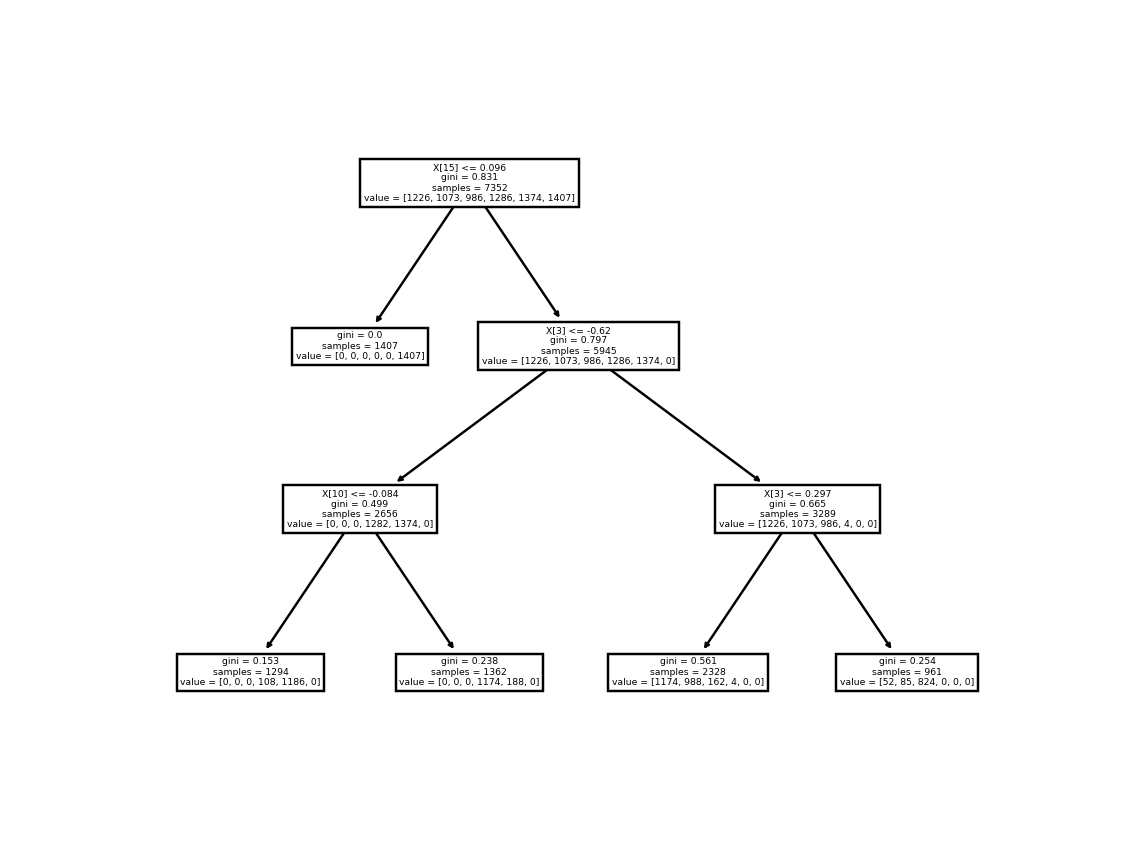

In [8]:
activity = {29:'Sitting'}


for key in activity.keys():
    _, ax = plt.subplots()
    ax.plot(X_train[key,:,:])
    ax.set_title(activity[key])
    plt.show()

## Antwort I.3

a) To be filled

In [9]:
# Antwort b)

## Aufgabe I.4: Die Features

Öffnen Sie die Dateien *features.txt* und *X_train.txt* mit einem Texteditor. Was steht in diesen Dateien?

## Antwort I.4

To be filled

# II. Der Decision Tree Classifier

Eine Einleitung in Decision Trees findet sich in youtube https://youtu.be/eKD5gxPPeY0 (Decision Tree Victor Lavrenko)

Für einen Decision Tree muss man definieren, welche features man reinnimmt (siehe unten).

## Aufgabe II.5

Betrachten Sie die folgende Liste an features. Um was für eine Art von features handelt es sich? Welche weiteren features wären evtl. sinnvoll?

## Antwort II.5

To be filled

In [10]:
# do not edit!
features = ['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z',
            'tBodyAcc-max()-X','tBodyAcc-max()-Y','tBodyAcc-max()-Z',
            'tBodyAcc-min()-X','tBodyAcc-min()-Y','tBodyAcc-min()-Z',
            'tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z',
            'tGravityAcc-max()-X','tGravityAcc-max()-Y','tGravityAcc-max()-Z',
            'tGravityAcc-min()-X','tGravityAcc-min()-Y','tGravityAcc-min()-Z'
            ]

In [11]:
# extract the entries that only contain the features
all_features = pd.read_csv(start_path / 'features.txt',sep=' ',header=None, index_col = 0)
all_features = all_features.values.reshape(-1)
rows=[np.where(all_features==features[i]) for i in range(len(features))]
rows = np.array(rows).flatten()
X_train = pd.read_csv(start_path / 'train/X_train.txt', header=None,delim_whitespace=True)
X_train = X_train[rows]
X_train.shape # should be (7352, 18)

(7352, 18)

Den Decision Tree definieren und berechnen:

In [12]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier(max_depth=3)
my_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

<IPython.core.display.Javascript object>


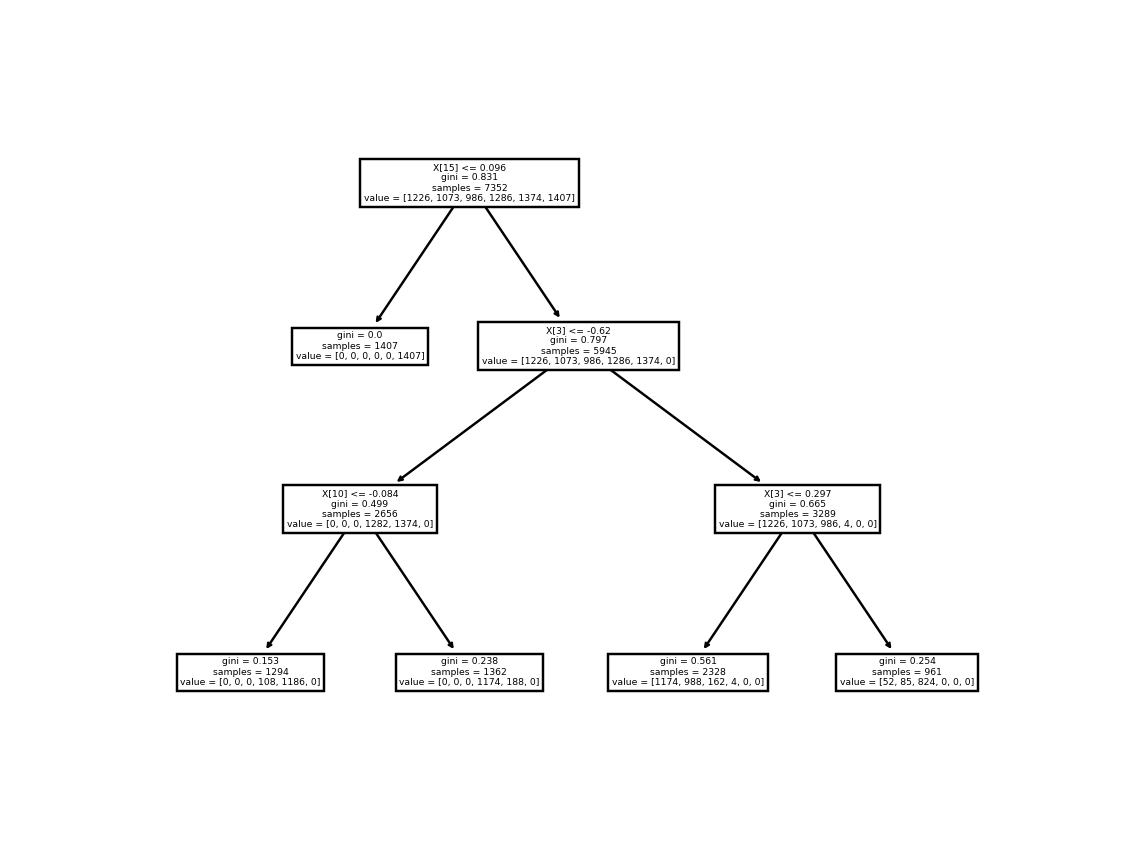

In [15]:
_, ax = plt.subplots()
tree.plot_tree(my_classifier)
plt.show()

## Aufgabe II.6

Betrachten Sie *X_train*. Was hat sich im Vergleich zu oben geändert?

In [16]:
X_train = pd.read_csv(start_path / 'train/X_train.txt', header=None,delim_whitespace=True)

## Antwort II.6

To be filled

<IPython.core.display.Javascript object>


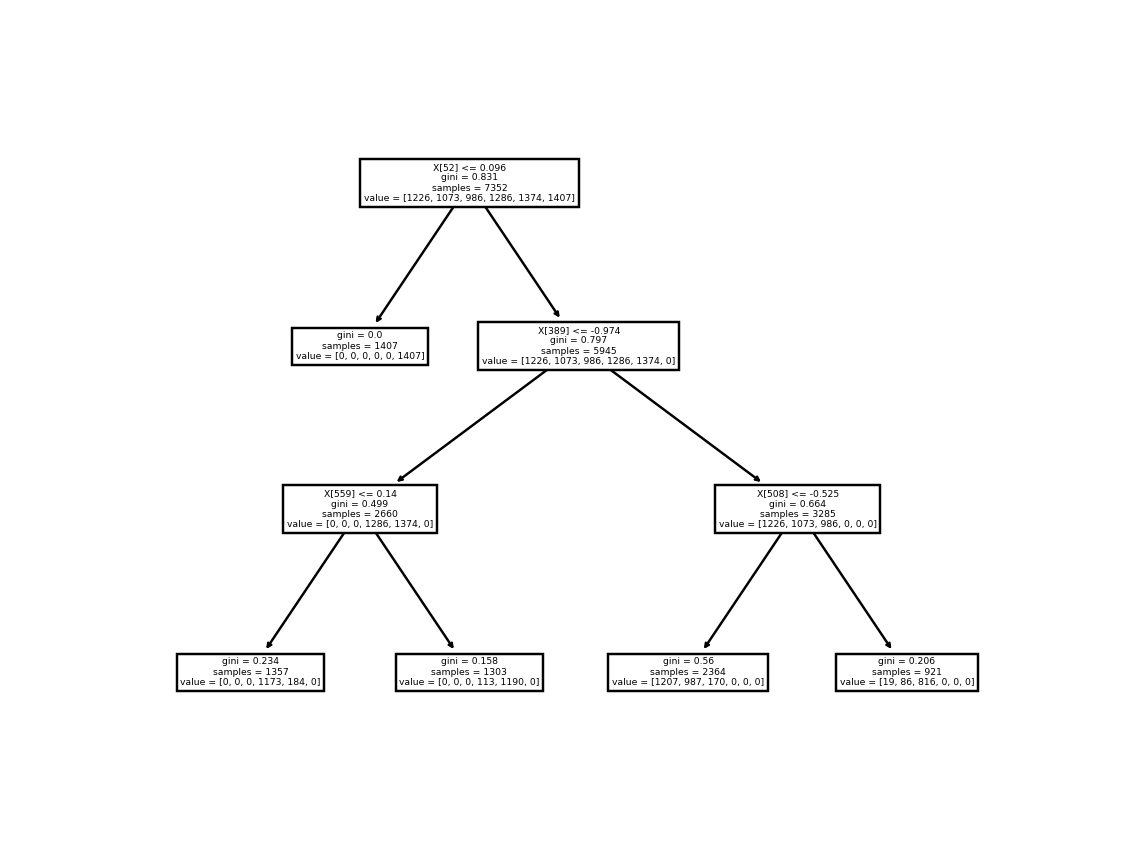

[Text(0.375, 0.875, 'X[52] <= 0.096\ngini = 0.831\nsamples = 7352\nvalue = [1226, 1073, 986, 1286, 1374, 1407]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 1407\nvalue = [0, 0, 0, 0, 0, 1407]'),
 Text(0.5, 0.625, 'X[389] <= -0.974\ngini = 0.797\nsamples = 5945\nvalue = [1226, 1073, 986, 1286, 1374, 0]'),
 Text(0.25, 0.375, 'X[559] <= 0.14\ngini = 0.499\nsamples = 2660\nvalue = [0, 0, 0, 1286, 1374, 0]'),
 Text(0.125, 0.125, 'gini = 0.234\nsamples = 1357\nvalue = [0, 0, 0, 1173, 184, 0]'),
 Text(0.375, 0.125, 'gini = 0.158\nsamples = 1303\nvalue = [0, 0, 0, 113, 1190, 0]'),
 Text(0.75, 0.375, 'X[508] <= -0.525\ngini = 0.664\nsamples = 3285\nvalue = [1226, 1073, 986, 0, 0, 0]'),
 Text(0.625, 0.125, 'gini = 0.56\nsamples = 2364\nvalue = [1207, 987, 170, 0, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.206\nsamples = 921\nvalue = [19, 86, 816, 0, 0, 0]')]

In [18]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier(max_depth=3)
my_classifier.fit(X_train,y_train)
_, ax = plt.subplots()
tree.plot_tree(my_classifier)

## Aufgabe II.7

Wie könnte man prüfen, ob ein Decision Tree geeignet ist?

## Antwort II.7

to be filled

In [19]:
X_train = pd.read_csv(start_path / 'train/X_train.txt', header=None,delim_whitespace=True)
y_train = pd.read_csv(start_path / 'train/y_train.txt', header=None,delim_whitespace=True)
X_test = pd.read_csv(start_path / 'test/X_test.txt', header=None,delim_whitespace=True)
y_test = pd.read_csv(start_path / 'test/y_test.txt', header=None,delim_whitespace=True)

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

## Aufgabe II.8

Wie könnte man *y_predict* evaluieren?

## Antwort II.8

To be filled

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, f1_score
score=accuracy_score(y_test,y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[485   0  11   0   0   0]
 [463   0   8   0   0   0]
 [138   0 282   0   0   0]
 [  0   0   0 400  91   0]
 [  0   0   0 107 425   0]
 [  0   0   0   0   0 537]]


<IPython.core.display.Javascript object>


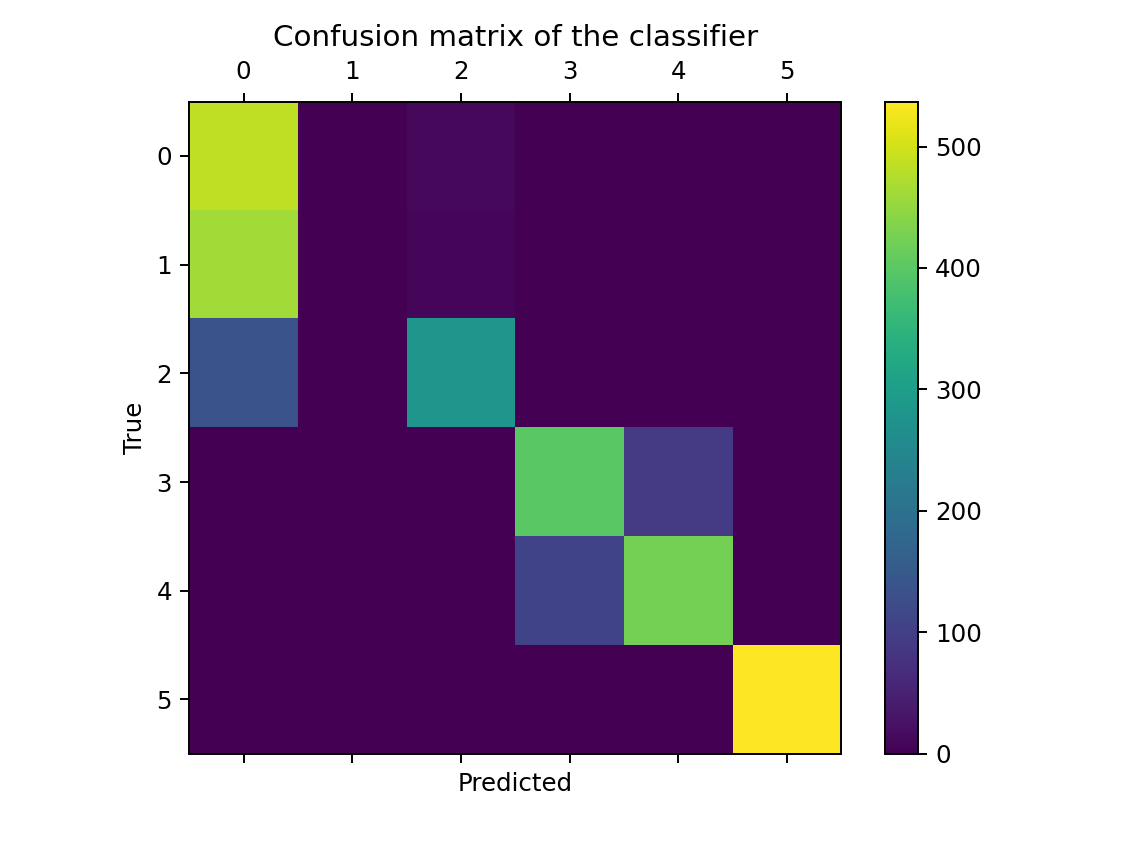

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True');

In [23]:
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict,labels=[1],average='micro'))
print(recall_score(y_test,y_predict,labels=[1],average='micro'))
print(f1_score(y_test,y_predict,labels=[1],average='micro'))

0.7224295894129623
0.44659300184162065
0.9778225806451613
0.6131479140328698


## Aufgabe II.9

Betrachten Sie die Evaluationsmetriken für *labels=[1]* (STANDING) oben. Was bedeutet das? Begründen Sie?

## Antwort II.9

To be filled

# III. Der SVM (support vector machine) Classifier

Wir wollen uns nun den SVM classifier anschauen:

In [24]:
X_train = pd.read_csv(start_path / 'train/X_train.txt', header=None,delim_whitespace=True)
y_train = pd.read_csv(start_path / 'train/y_train.txt', header=None,delim_whitespace=True)
X_test = pd.read_csv(start_path / 'test/X_test.txt', header=None,delim_whitespace=True)
y_test = pd.read_csv(start_path / 'test/y_test.txt', header=None,delim_whitespace=True)

Der folgende Code kann einige Sekunden rechnen:

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf2.fit(X_train, y_train.values.ravel())
y_predict2 = clf2.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_predict2))
print(precision_score(y_test,y_predict2,labels=[1],average='micro'))
print(recall_score(y_test,y_predict2,labels=[1],average='micro'))
print(f1_score(y_test,y_predict2,labels=[1],average='micro'))

0.9521547336274178
0.9601593625498008
0.9717741935483871
0.965931863727455


## Aufgabe III.10

Vergleichen Sie die Werte mit den Werten des Classifiers vom Decision Tree. Was fällt Ihnen auf? Welche Vor- und Nachteile haben die verschiedenen Methoden?

## Antwort III.10

To be filled

Durch eine geeignete Wahl der features kann sehen, wie die SVM arbeitet:

In [27]:
features3 = ['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z',
            'tBodyAcc-max()-X','tBodyAcc-max()-Y','tBodyAcc-max()-Z',
            'tBodyAcc-min()-X','tBodyAcc-min()-Y','tBodyAcc-min()-Z',
            'tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z',
            'tGravityAcc-max()-X','tGravityAcc-max()-Y','tGravityAcc-max()-Z',
            'tGravityAcc-min()-X','tGravityAcc-min()-Y','tGravityAcc-min()-Z'
            ]

In [28]:
rows=[np.where(all_features==features[i]) for i in range(len(features))]
rows = np.array(rows).flatten()
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf3.fit(X_train[rows], y_train.values.ravel())
y_predict3 = clf3.predict(X_test[rows])

In [29]:
print(accuracy_score(y_test,y_predict3))
print(precision_score(y_test,y_predict3,labels=[1],average='micro'))
print(recall_score(y_test,y_predict3,labels=[1],average='micro'))
print(f1_score(y_test,y_predict3,labels=[1],average='micro'))

0.7855446216491347
0.6139705882352942
0.6733870967741935
0.6423076923076924


**Bemerkung zu SVM**: Der Datensatz enthaelt ueber 500 features und es ist unklar, welche die entscheidenden sind. Dies nennt man machmal auch "Curse of dimensionality". Man kann hier "rumprobieren" bis man die entscheidenden Features hat, es ist aber ad-hoc unklar, wie man vorgehen kann.